# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [47]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [48]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [49]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | diffa
Processing Record 3 of Set 1 | toliara
Processing Record 4 of Set 1 | amasra
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | flying fish cove
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | biguacu
Processing Record 9 of Set 1 | seven pagodas
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | kish
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | usogorsk
Processing Record 16 of Set 1 | kamloops
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | nemuro
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set

In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.76,71,100,7.76,SH,1724616370
1,diffa,13.3154,12.6113,26.18,74,100,5.47,NE,1724616372
2,toliara,-23.3500,43.6667,23.46,62,0,2.54,MG,1724616373
3,amasra,41.7463,32.3863,22.11,78,2,2.28,TR,1724616374
4,saldanha,-33.0117,17.9442,10.03,88,10,5.08,ZA,1724616031


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("../Resources/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("../Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.76,71,100,7.76,SH,1724616370
1,diffa,13.3154,12.6113,26.18,74,100,5.47,NE,1724616372
2,toliara,-23.3500,43.6667,23.46,62,0,2.54,MG,1724616373
3,amasra,41.7463,32.3863,22.11,78,2,2.28,TR,1724616374
4,saldanha,-33.0117,17.9442,10.03,88,10,5.08,ZA,1724616031


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

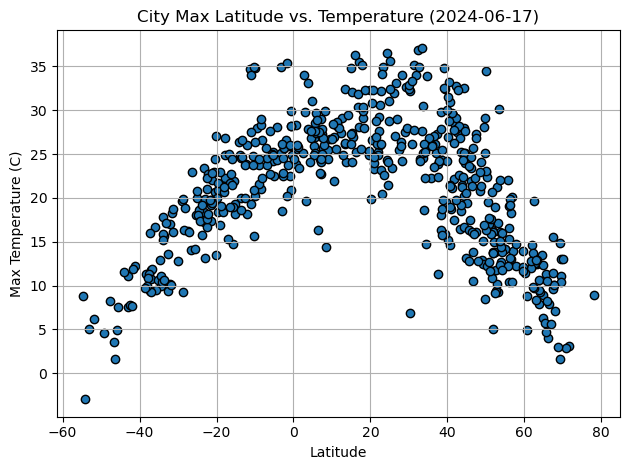

In [54]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",edgecolor="black")


plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.grid(True)

# Save the figure
plt.savefig("../Resources/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

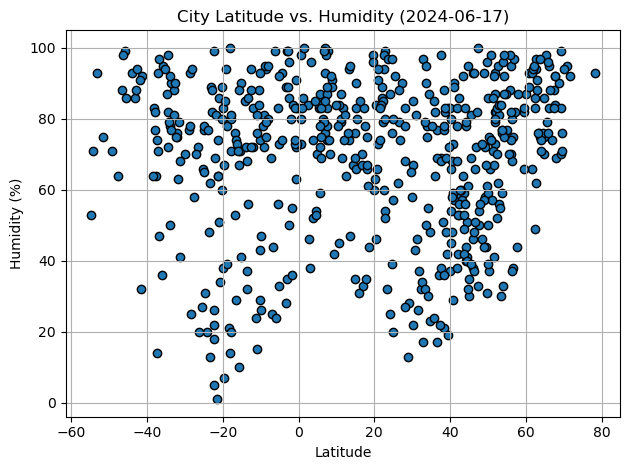

In [55]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.grid(True)

# Save the figure
plt.savefig("../Resources/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

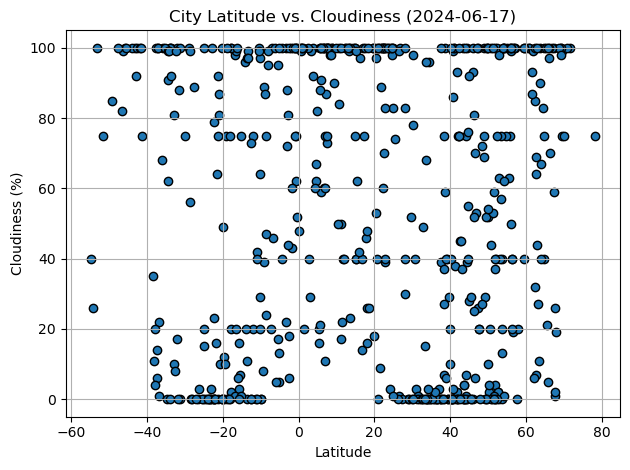

In [56]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.grid(True)

# Save the figure
plt.savefig("../Resources/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

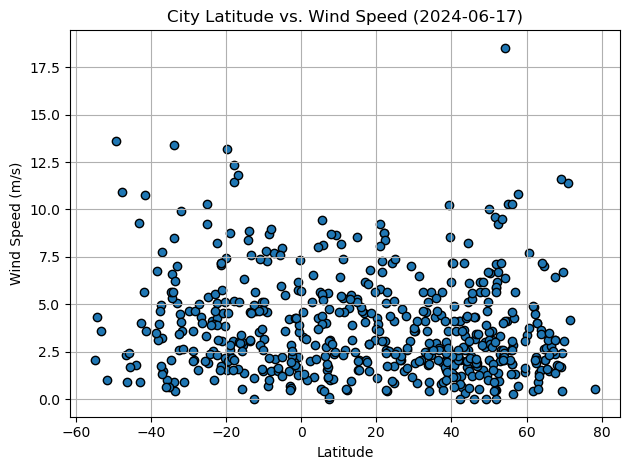

In [57]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.grid(True)

# Save the figure
plt.savefig("../Resources/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values,y_values, column_name, eq_position):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # print(line_eq)
    
    # Create Plot
    plt.scatter(x_values,y_values,marker="o")
    plt.plot(x_values,regress_values,"r-")
    
    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(column_name)
    plt.annotate(line_eq,(eq_position),fontsize=15,color="red")
    plt.title(f"Latitude vs {column_name}")
    
    # Print r^2 value
    print(f"The r^2-value is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,diffa,13.3154,12.6113,26.18,74,100,5.47,NE,1724616372
3,amasra,41.7463,32.3863,22.11,78,2,2.28,TR,1724616374
8,seven pagodas,12.6264,80.1722,29.15,64,100,4.78,IN,1724616380
10,kish,26.5578,54.0194,33.15,79,1,2.06,IR,1724616383
13,usogorsk,63.4106,48.6872,12.46,76,11,1.39,RU,1724616388


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.76,71,100,7.76,SH,1724616370
2,toliara,-23.3500,43.6667,23.46,62,0,2.54,MG,1724616373
4,saldanha,-33.0117,17.9442,10.03,88,10,5.08,ZA,1724616031
5,flying fish cove,-10.4217,105.6791,24.82,88,100,5.14,CX,1724616376
6,saint-philippe,-21.3585,55.7679,19.23,74,92,7.05,RE,1724615873


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.49241485311803196


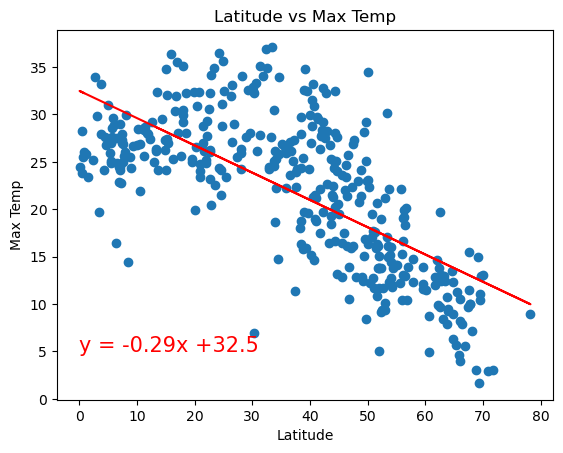

In [61]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
column_name = "Max Temp"
eq_position = (0,5)

linear_regression_plots(x_values,y_values,column_name,eq_position)

The r^2-value is: 0.7311124234822494


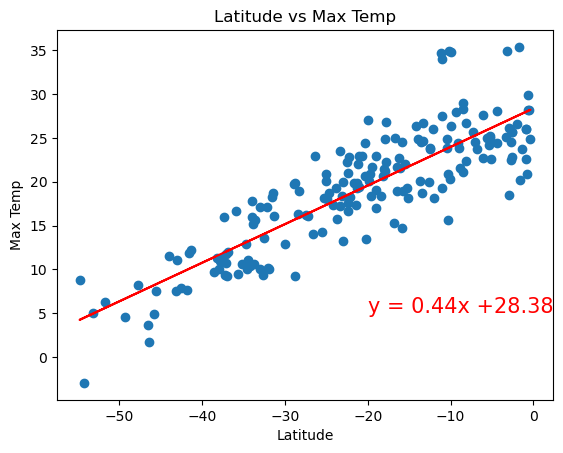

In [62]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
column_name = "Max Temp"
eq_position = (-20,5)

linear_regression_plots(x_values,y_values,column_name,eq_position)

**Discussion about the linear relationship:** 
The value of r^2 is 0.73 which indicateds a strong positive linear relationship. Latitude has a significant impact on max temperature. As the latitude increases the max temperature increases as well.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0005376041217938022


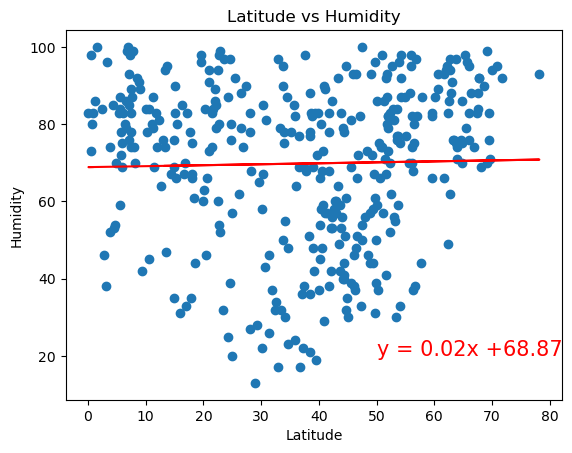

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
column_name = "Humidity"
eq_position = (50,20)

linear_regression_plots(x_values,y_values,column_name,eq_position)

The r^2-value is: 0.009609425520289433


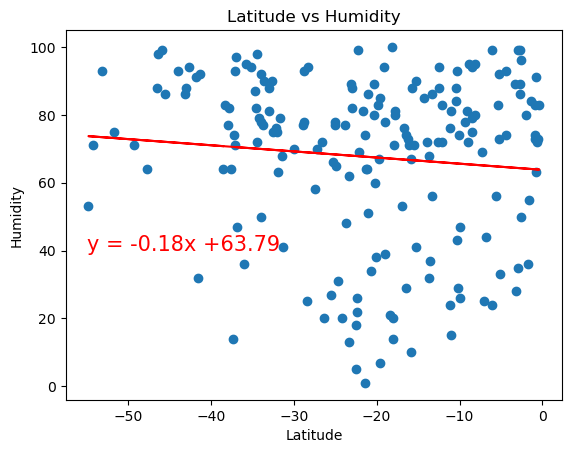

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
column_name = "Humidity"
eq_position =(-55,40)

linear_regression_plots(x_values,y_values,column_name,eq_position)

**Discussion about the linear relationship:**
The r^2 value of 0.0096 inidcates a weak correlation between Latitude vs Humidity. Exploring other potential predictors or variables that might better explain variations in humidity should be considered due to the weak relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.019109000226890882


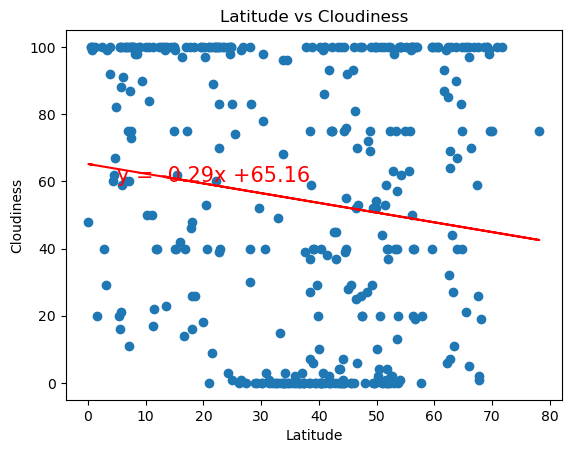

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
column_name = "Cloudiness"
eq_position =(5,60)

linear_regression_plots(x_values,y_values,column_name,eq_position)

The r^2-value is: 0.004794176555825472


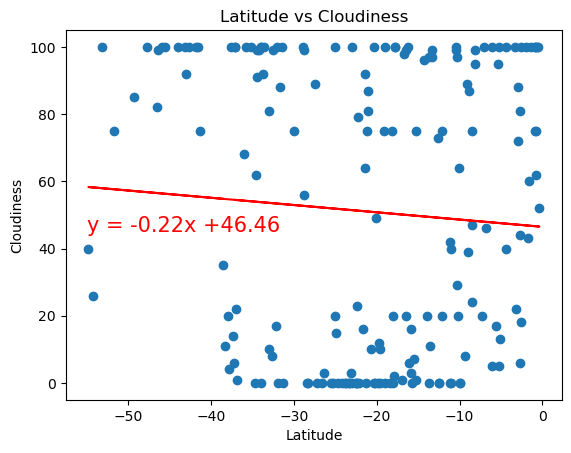

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
column_name = "Cloudiness"
eq_position= (-55,45)

linear_regression_plots(x_values,y_values,column_name,eq_position)

**Discussion about the linear relationship:** 
Since the r^2 value is approximately 0.005, this indicates a very weak linear relationship between Cloudiness and Latitude. The independent variable (Latitude) does not appear to be a good predictor of the dependent variable (Cloudiness). The linear regression does not provide a meaningful fit to the data points.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.002590624173021995


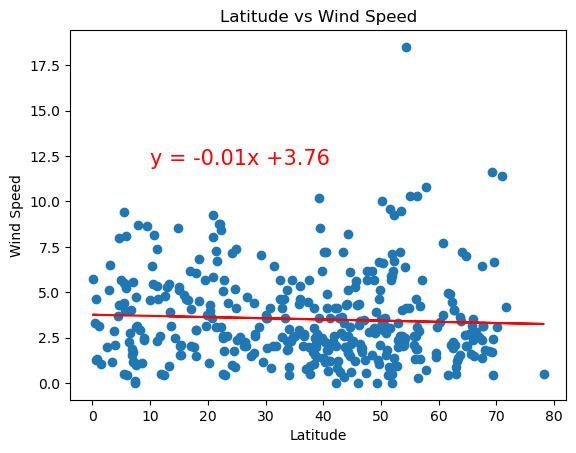

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
column_name = "Wind Speed"
eq_position= (10,12)

linear_regression_plots(x_values,y_values,column_name,eq_position)

The r^2-value is: 0.006476697006830885


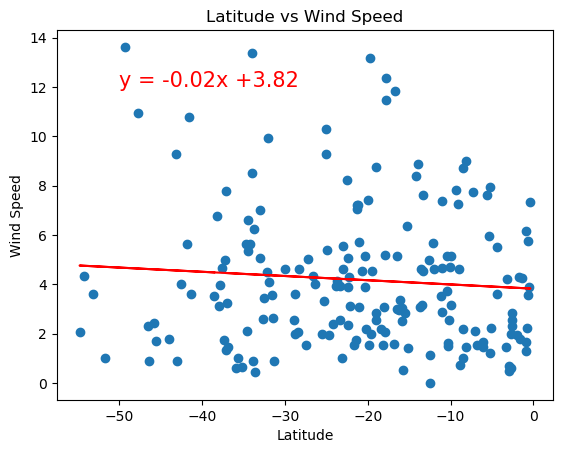

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
column_name = "Wind Speed"
eq_position= (-50,12)

linear_regression_plots(x_values,y_values,column_name,eq_position)

**Discussion about the linear relationship:** 
This data set has r^2 value of 0.006, which indicates a weak relationship between latitude and wind speed. The latitude does not significantly influence the wind speed based on this data.
